In [16]:
import sys
sys.path.append('/Users/reketejmakrety/Documents/projects/multistate_dynamical_processes_networks')
import numpy as np
import matplotlib.pyplot as plt
from multistate_processes.barabasi_albert import BarabasiAlbert
from multistate_processes.process import MultistateProcess
from multistate_processes.simulate import SimulateProcess
from multistate_processes.meanField import MeanField

In [22]:
N = 100
n = 4
num_infected = 30
T = 50

network = BarabasiAlbert(N, 2)

rate_matrix = np.array([
    ['0', 'beta*({1} + {3})', 'beta*({2} + {3})', '0'], 
    ['1', '0', '0', 'lamb*beta*({2} + {3})'], 
    ['1', '0', '0', 'lamb*beta*({1} + {3})'],
    ['0', '1', '1', 0]
])

sir_process = MultistateProcess(rate_matrix, lamb=2, beta=0.25)

states = [0] * N
infected_nodes = np.random.choice(list(range(N)), num_infected).tolist()

for i, e in enumerate(infected_nodes[:-20]):
    states[i] = 1
    states[infected_nodes[i+10]] = 2
    states[infected_nodes[i+20]] = 3

X = np.zeros((T, n, int(network.k_max)))
S = np.zeros((T, n))

degrees = network.degrees_list
for node in range(N):
    X[0][states[node]][degrees[node] - 1] += 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


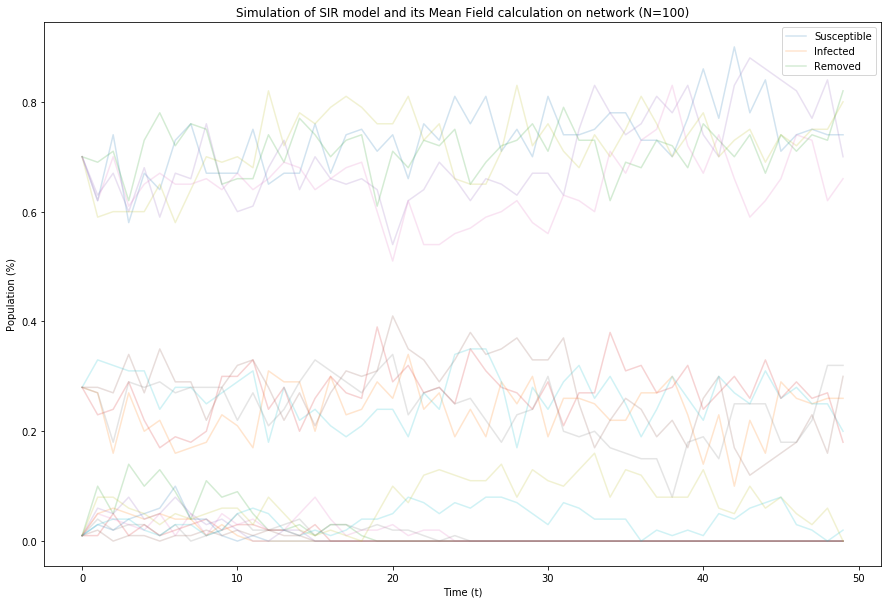

In [23]:
X = np.nan_to_num(X / np.sum(X[0], axis=0))
S[0] = np.array([N - num_infected, num_infected - 2, 1, 1])

mean_field = MeanField(network, sir_process, T, X)

calculate_mean_field = iter(mean_field)
plt.figure(figsize=(15, 10))
# for t in range(1, T):
#     next(calculate_mean_field)

#plt.plot(np.arange(T), mean_field.rho(calculate_mean_field.x), linewidth=2)

for i in range(5):
    sir = SimulateProcess(network, sir_process, T, states)
    simulate_sir = iter(sir)
    for t in range(1, T):
        s = next(simulate_sir)
        S[t] = np.histogram(s, bins=list(range(n + 1)))[0]
    
    plt.plot(np.arange(T), S / N, alpha=0.2)

plt.ylabel('Population (%)')
plt.xlabel('Time (t)')
plt.title(f'Simulation of SIR model and its Mean Field calculation on network (N={N})')
plt.legend(['Susceptible', 'Infected', 'Removed'])
plt.show()

In [24]:
S

array([[70., 28.,  1.,  1.],
       [62., 27.,  8.,  3.],
       [70., 18.,  8.,  4.],
       [61., 29.,  6.,  4.],
       [65., 28.,  5.,  2.],
       [67., 29.,  3.,  1.],
       [65., 27.,  5.,  3.],
       [65., 28.,  4.,  3.],
       [66., 28.,  5.,  1.],
       [64., 28.,  6.,  2.],
       [67., 22.,  6.,  5.],
       [64., 27.,  3.,  6.],
       [66., 21.,  8.,  5.],
       [69., 24.,  5.,  2.],
       [68., 29.,  2.,  1.],
       [64., 33.,  1.,  2.],
       [66., 31.,  2.,  1.],
       [68., 29.,  1.,  2.],
       [69., 27.,  0.,  4.],
       [60., 31.,  5.,  4.],
       [51., 34., 10.,  5.],
       [62., 23.,  7.,  8.],
       [54., 27., 12.,  7.],
       [54., 28., 13.,  5.],
       [56., 25., 12.,  7.],
       [57., 26., 11.,  6.],
       [59., 22., 11.,  8.],
       [60., 18., 14.,  8.],
       [62., 23.,  8.,  7.],
       [58., 24., 13.,  5.],
       [56., 30., 11.,  3.],
       [63., 20., 10.,  7.],
       [62., 19., 13.,  6.],
       [60., 20., 16.,  4.],
       [71., 1